In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
load_mpl_style('single_plot.mplstyle')
ignore_warnings()

In [3]:
from pandas_datareader import data as web
import datetime as dt
import quandl

In [4]:
start = dt.datetime(2017,6,1)
end = dt.datetime(2018,2,20)

In [5]:
SPX = web.DataReader('^GSPC', data_source='yahoo', start=start, end=end)
VIX = web.DataReader('^VIX', data_source='yahoo', start=start, end=end)

In [6]:
len(SPX)

183

In [7]:
SPX['30ma'] = SPX['Adj Close'].rolling(window=30).mean()

In [8]:
SPX.describe()

,Open,High,Low,Close,Adj Close,Volume,30ma
count,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,154.000000
mean,2562.148289,2570.126770,2553.711534,2562.794983,2562.794983,3.438838e+09,2558.959473
std,120.539822,123.192380,118.685471,120.713837,120.713837,6.419286e+08,105.598453
min,2413.520020,2415.989990,2403.590088,2409.750000,2409.750000,1.349780e+09,2431.738997
25%,2462.449951,2466.244995,2452.650024,2459.940064,2459.940064,3.068260e+09,2461.536611
50%,2549.989990,2552.510010,2541.600098,2550.639893,2550.639893,3.368590e+09,2539.729004
75%,2646.239991,2666.640014,2635.505005,2650.219971,2650.219971,3.643390e+09,2629.858689
max,2867.229980,2872.870117,2851.479980,2872.870117,2872.870117,5.891660e+09,2764.714014


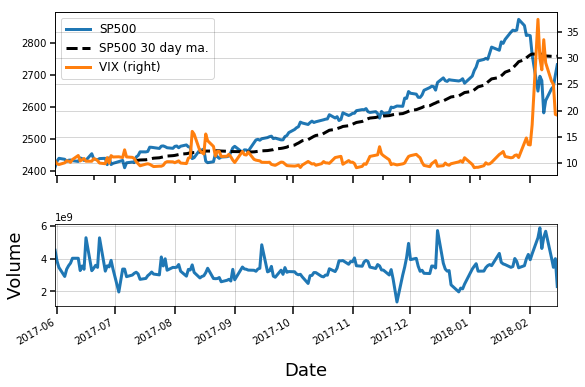

In [10]:
f,(a1,a2) = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[2, 1]})
SPX['Adj Close'].plot(ax=a1, label='SP500', legend=True)
SPX['30ma'].plot(ax=a1, linestyle='--', c='k', label='SP500 30 day ma.', legend=True)
VIX['Adj Close'].plot(secondary_y=True, ax=a1, label='VIX', legend=True)
SPX['Volume'].plot(ax=a2)
a2.set_ylabel('Volume')